In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from itertools import chain

In [2]:
output_dir = os.path.join('/home/kedoxey/CRCNS/PyramidalCellSimulations','models/NEURON/NMLCL000073-NEURON','output')
firing_rates_fname = 'firing_rates.pkl'
firing_rates_path = os.path.join(output_dir,firing_rates_fname)

with open(firing_rates_path,'rb') as fp:
    firing_rates = pickle.load(fp)

In [11]:
remove_fr = True
scale_fr = False
save_fr = True
if remove_fr:
    to_remove = {'basal': [5*i for i in range(77,101)]}
                #  'basal': list(chain([53],[5*i for i in range(51,101)]))}
    for syns_type, num_syns in to_remove.items():
        for num_syn in num_syns:
            try:
                firing_rates[syns_type].pop(num_syn)
            except KeyError:
                continue

if scale_fr:
    to_scale = {'basal': [5*i for i in range(83,101)]}
    for syns_type, num_syns in to_scale.items():
        for num_syn in num_syns:
            try:
                firing_rates[syns_type][num_syn] /= 4900
            except KeyError:
                continue

if save_fr:
    with open(firing_rates_path,'wb') as fp:
        pickle.dump(firing_rates,fp)

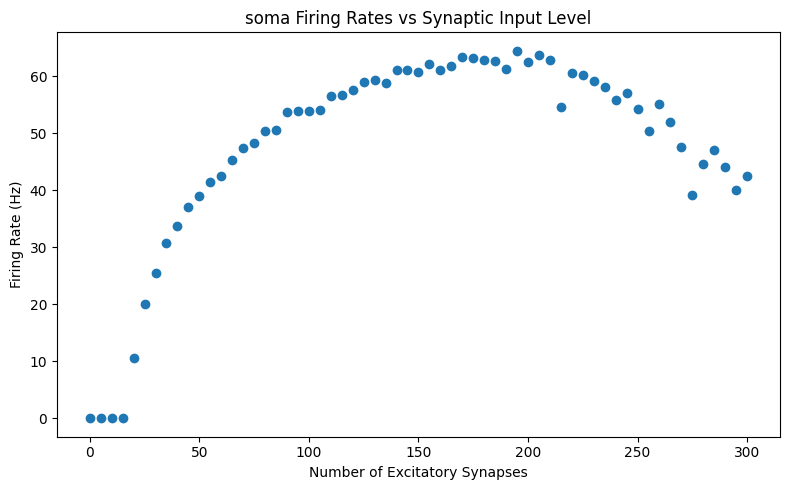

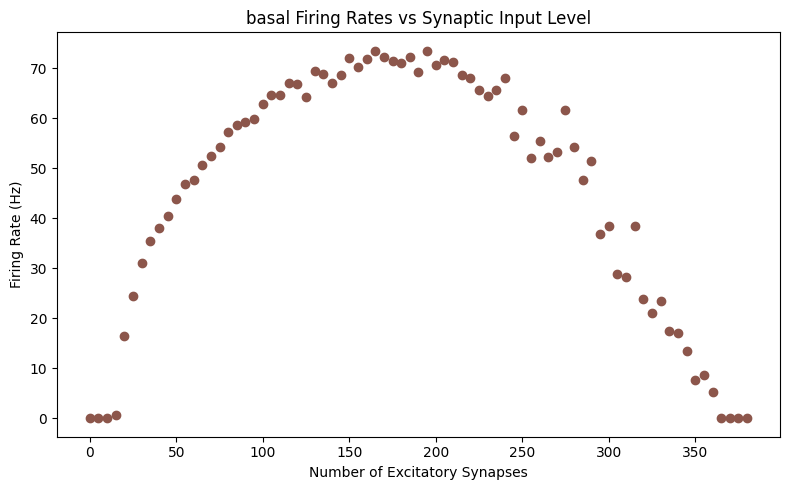

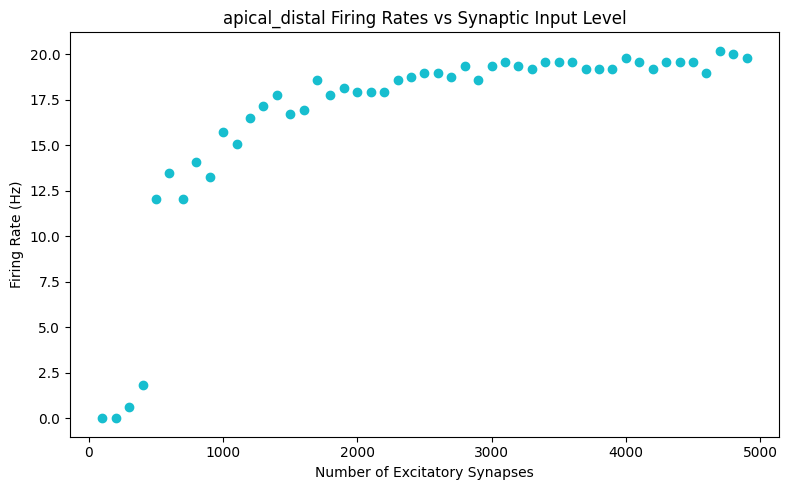

In [3]:

cmap = mpl.colormaps['tab10']
colors = cmap(np.linspace(0,1,len(firing_rates)))

for i, (syns_type, syns_sim) in enumerate(firing_rates.items()):
    
    fig, axs = plt.subplots(1,1, figsize=(8,5))
    
    for num_syns, firing_rate in syns_sim.items():
        axs.plot(num_syns, firing_rate, 'o', color=colors[i])
        
    axs.set_xlabel('Number of Excitatory Synapses')
    axs.set_ylabel('Firing Rate (Hz)')
    axs.set_title(f'{syns_type} Firing Rates vs Synaptic Input Level')
    fig.tight_layout()
    # fig.savefig(os.path.join(output_dir,'firing_rates',f'{syns_type}-firing_rates.png'),dpi=300)
        

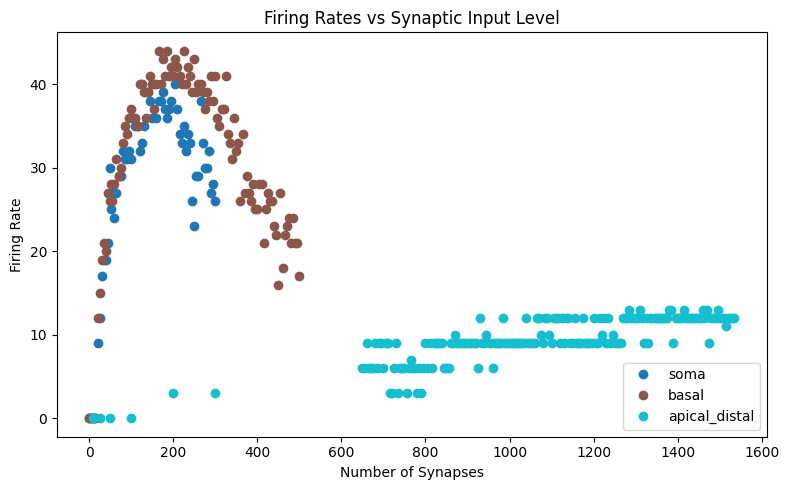

In [10]:
fig, axs = plt.subplots(1,1, figsize=(8,5))

for i, (syns_type, syns_sim) in enumerate(firing_rates.items()):

    syns = []
    rates = []

    for num_syns, firing_rate in syns_sim.items():
        syns.append(num_syns)
        rates.append(firing_rate)

    axs.plot(syns, rates, 'o', color=colors[i], label=syns_type)
        
    axs.set_xlabel('Number of Excitatory Synapses')
    axs.set_ylabel('Firing Rate (Hz)')

axs.legend(loc='lower right')
axs.set_title('Firing Rates vs Synaptic Input Level')

fig.tight_layout()
fig.savefig(os.path.join(output_dir,'firing_rates','all-firing_rates.png'),dpi=300)
        